# Marketing Data - Customer Segmentation

Customer segmentation and analysis is one of they most useful things to come out of machine learning from a business standpoint. If you can better understand your customers, you can provide products, services and offers that will meet those needs and help the business prosper.

Data Card for dataset, taken from Kaggle.

Context

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

Content

AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
Complain - 1 if customer complained in the last 2 years
DtCustomer - date of customer’s enrolment with the company
Education - customer’s level of education
Marital - customer’s marital status
Kidhome - number of small children in customer’s household
Teenhome - number of teenagers in customer’s household
Income - customer’s yearly household income
MntFishProducts - amount spent on fish products in the last 2 years
MntMeatProducts - amount spent on meat products in the last 2 years
MntFruits - amount spent on fruits products in the last 2 years
MntSweetProducts - amount spent on sweet products in the last 2 years
MntWines - amount spent on wine products in the last 2 years
MntGoldProds - amount spent on gold products in the last 2 years
NumDealsPurchases - number of purchases made with discount
NumCatalogPurchases - number of purchases made using catalogue
NumStorePurchases - number of purchases made directly in stores
NumWebPurchases - number of purchases made through company’s web site
NumWebVisitsMonth - number of visits to company’s web site in the last month
Recency - number of days since the last purchase

Acknowledgements

O. Parr-Rud. Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner. SAS Institute, 2014.
Inspiration

The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.

## Import and EDA

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting for full table display
pd.set_option('display.max_columns', None)

In [3]:
# Load the csv file
df = pd.read_csv('data/marketing_campaign.csv', sep='\t')

In [4]:
# Display the first few rows of the dataframe
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
# Check the general information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Check the statistical summary of the dataframe
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
# Check the number of null values in each column
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# Select only object columns and drop 'Dt_Customer' column
object_columns = df.select_dtypes(include='object').drop(columns='Dt_Customer')

# Iterate through each column and print unique values
for column in object_columns:
    print(f"Unique values for {column}: {df[column].unique()}")

Unique values for Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values for Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


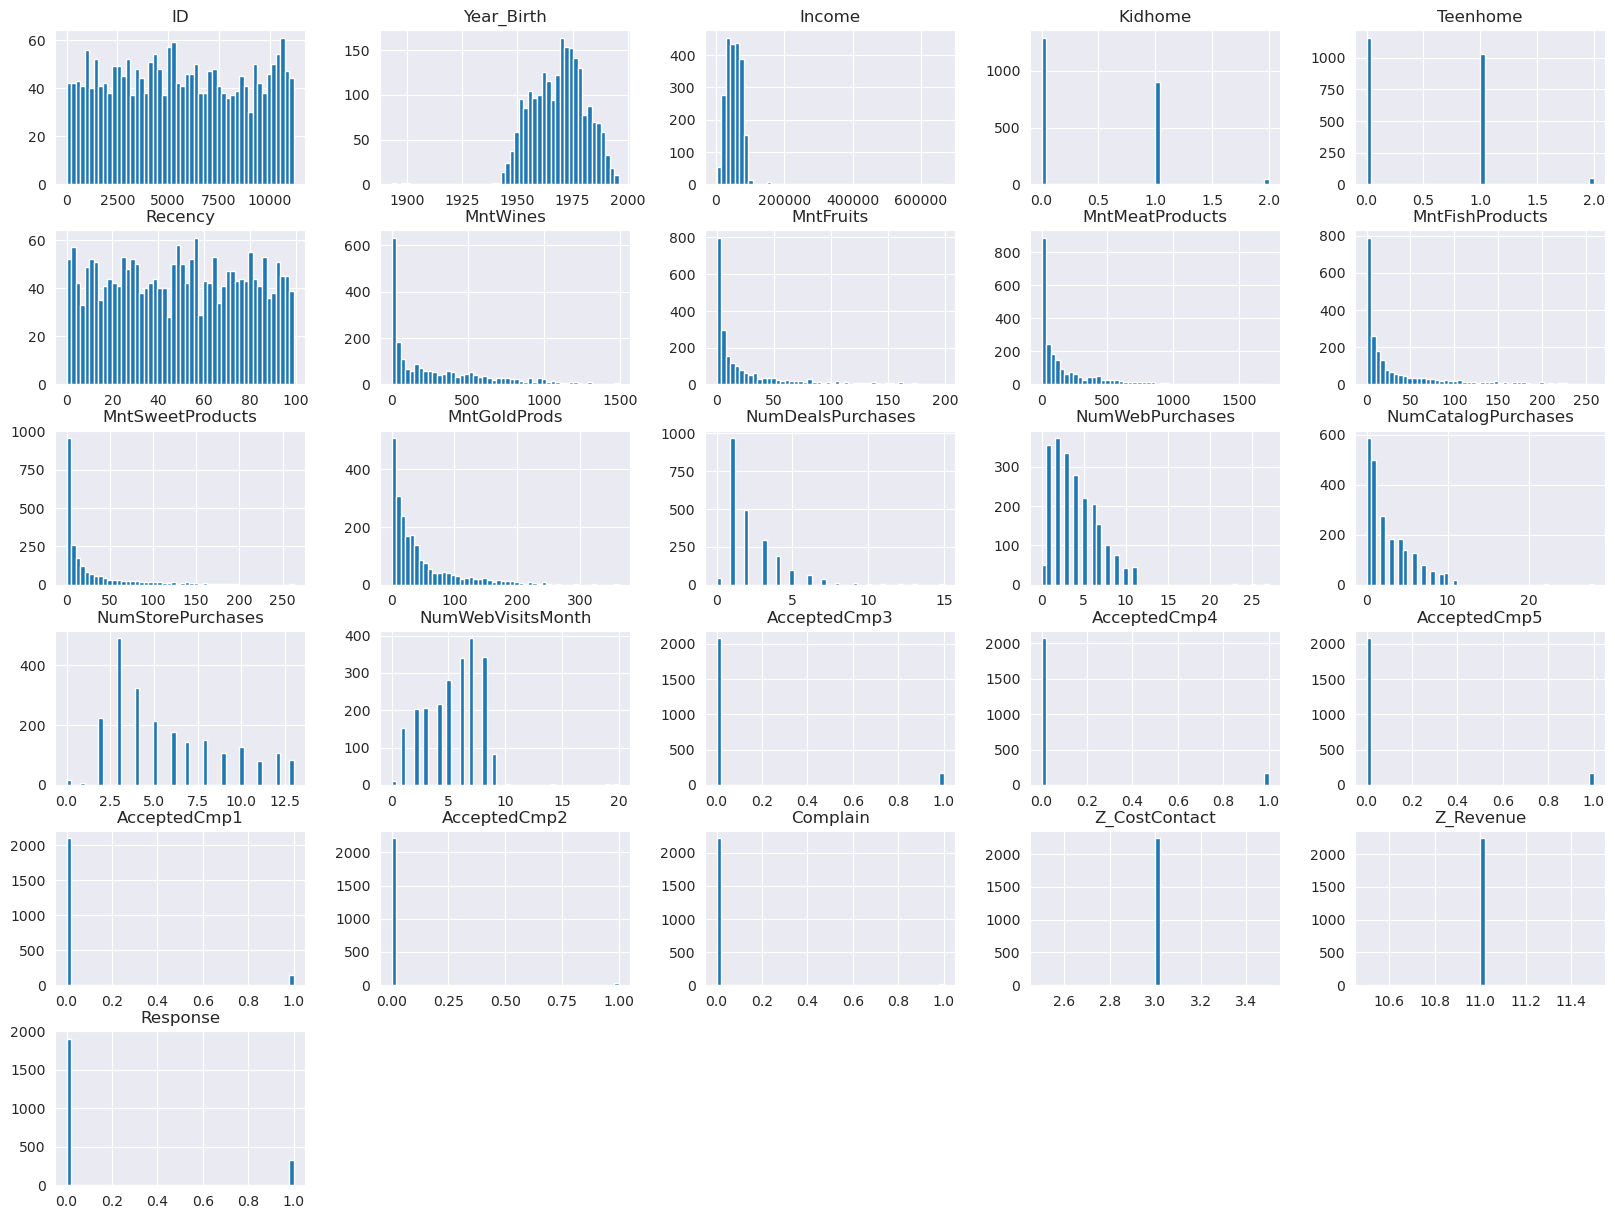

In [9]:
# Plot histograms for numeric columns to understand the distribution
df.hist(bins=50, figsize=(20, 15))
plt.show()

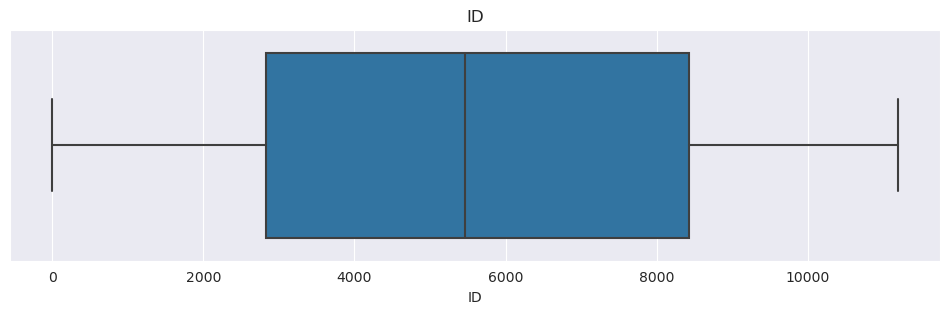

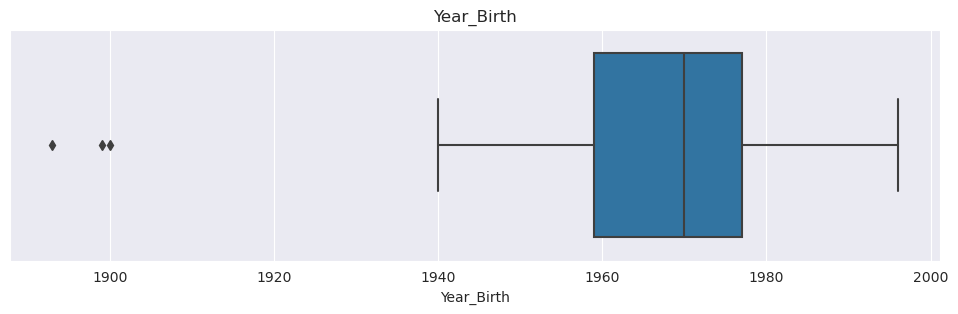

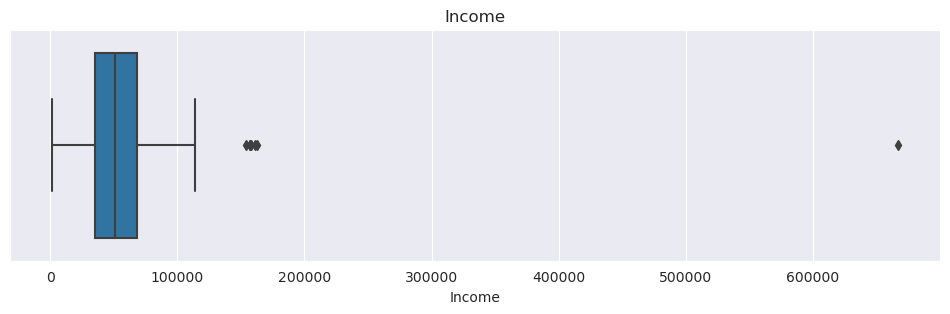

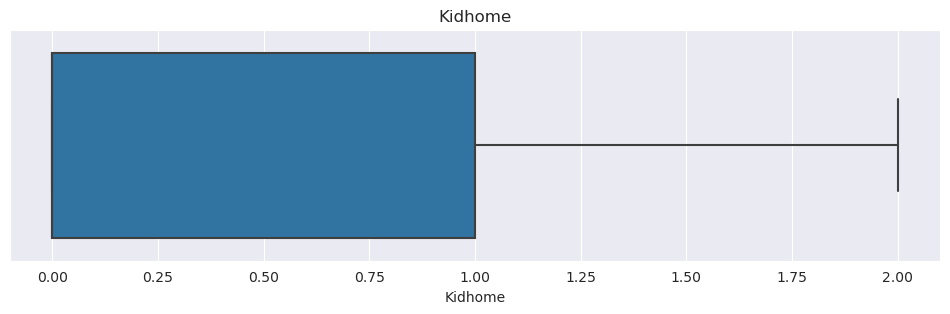

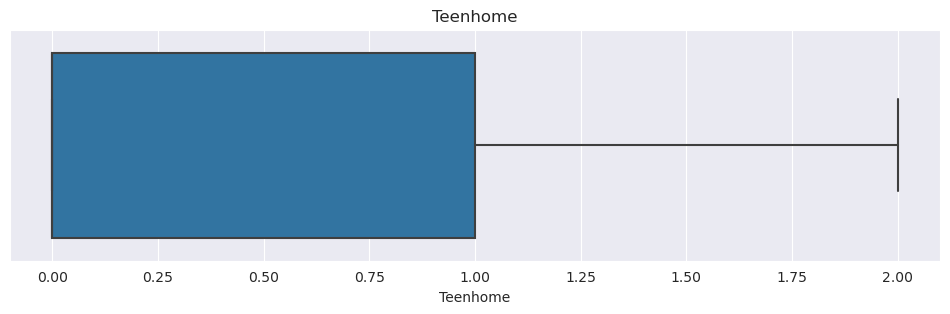

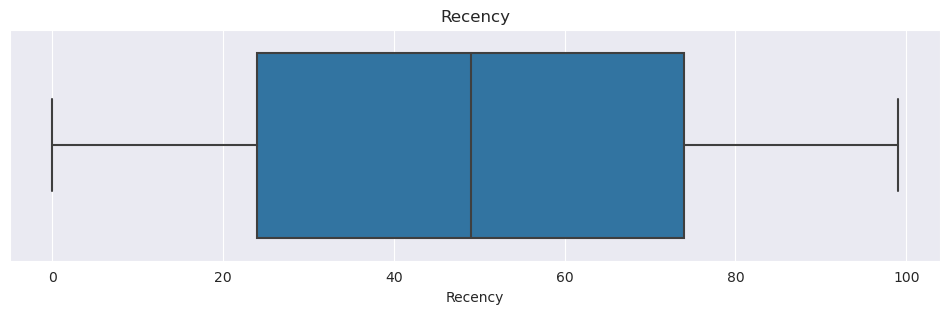

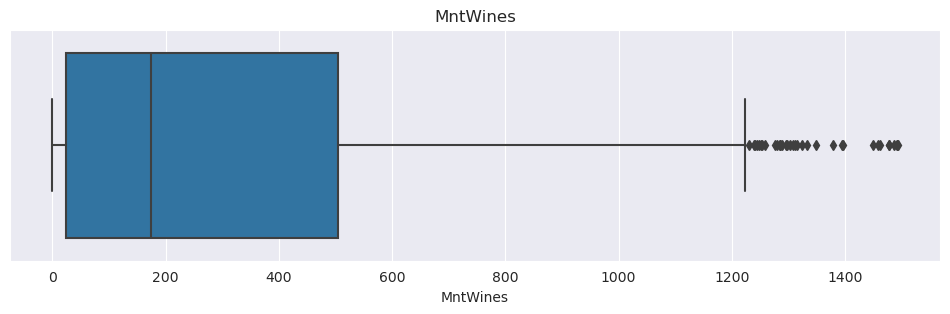

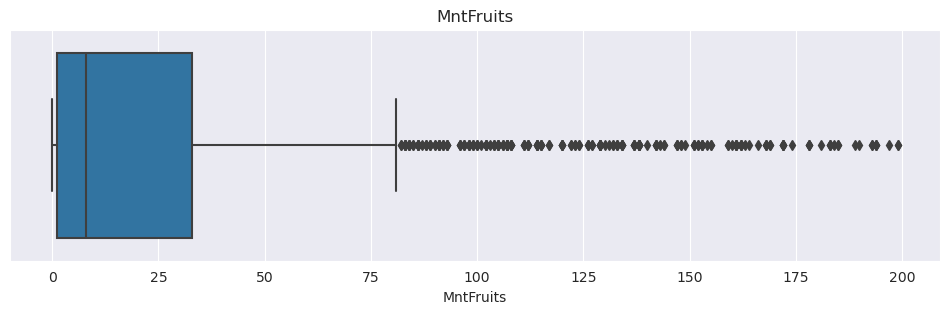

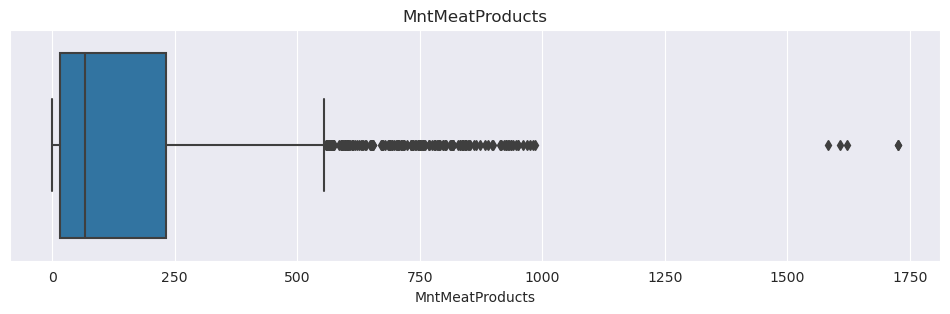

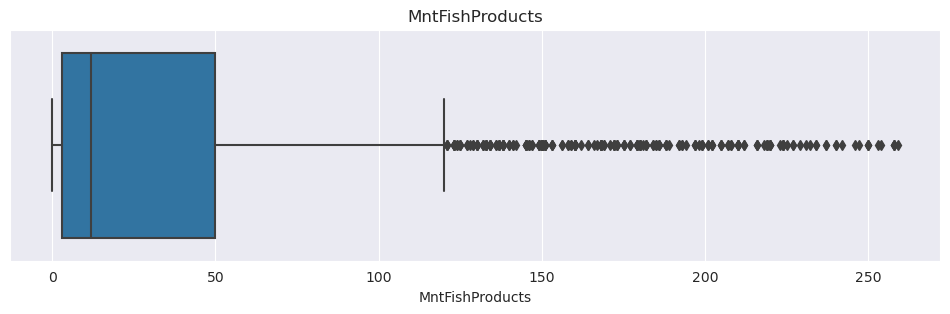

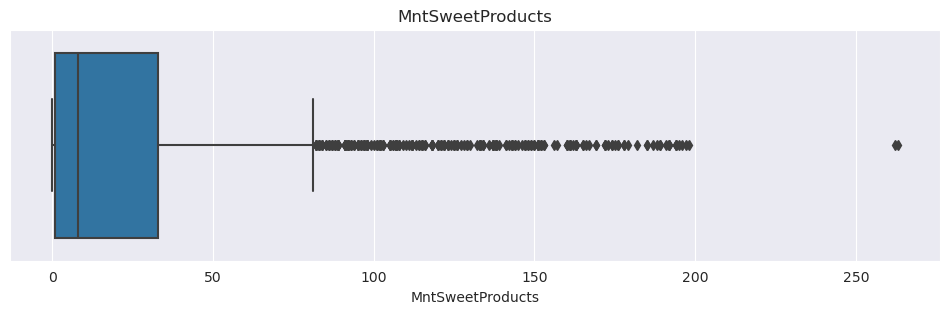

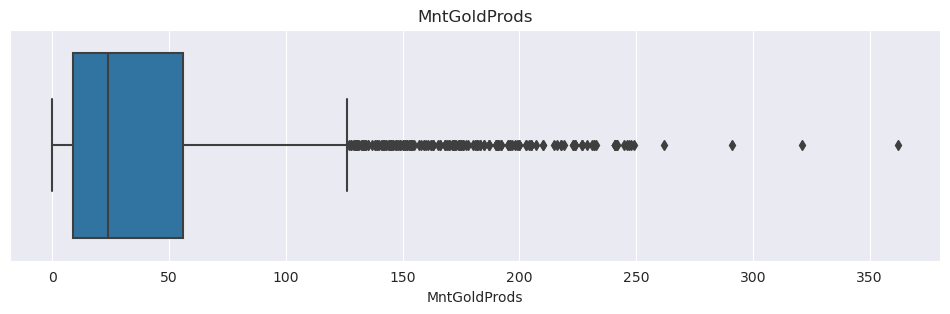

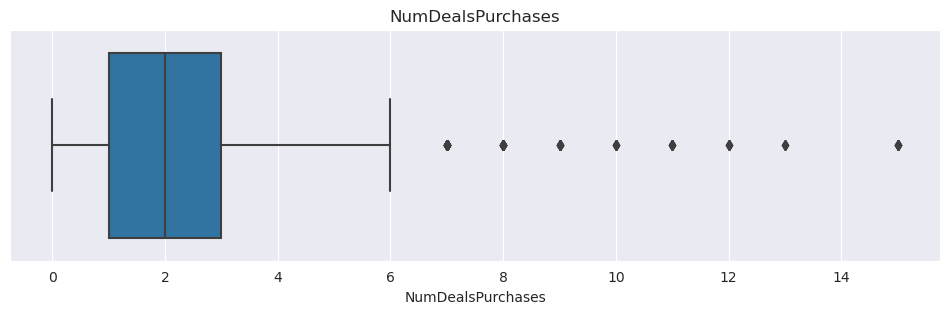

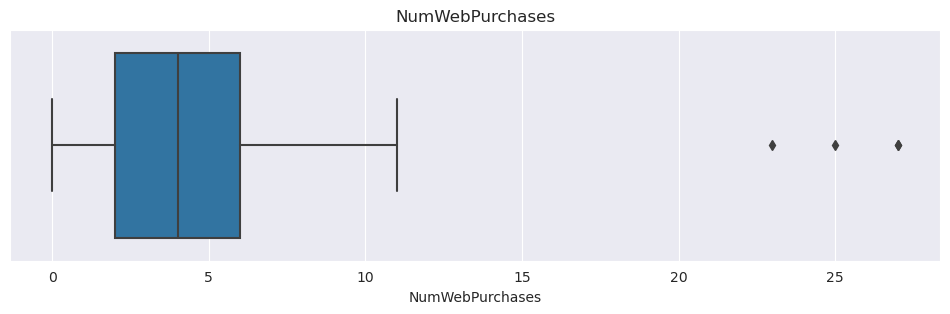

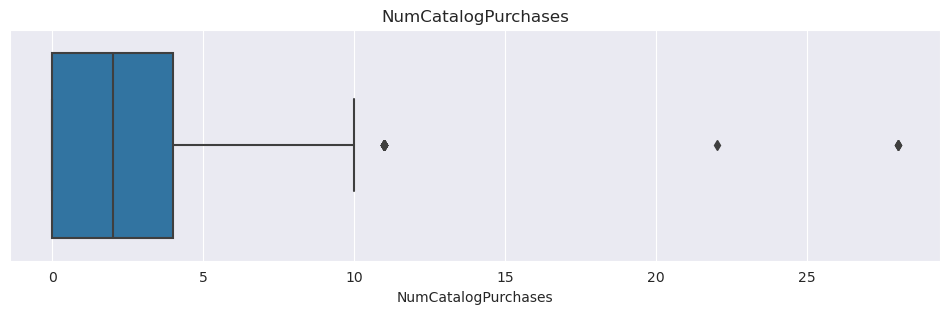

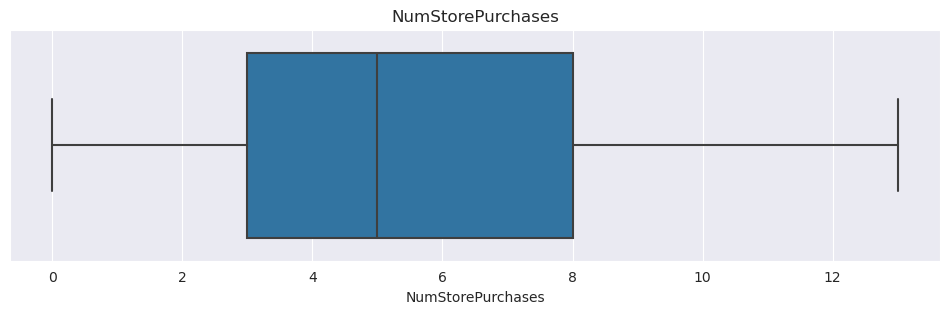

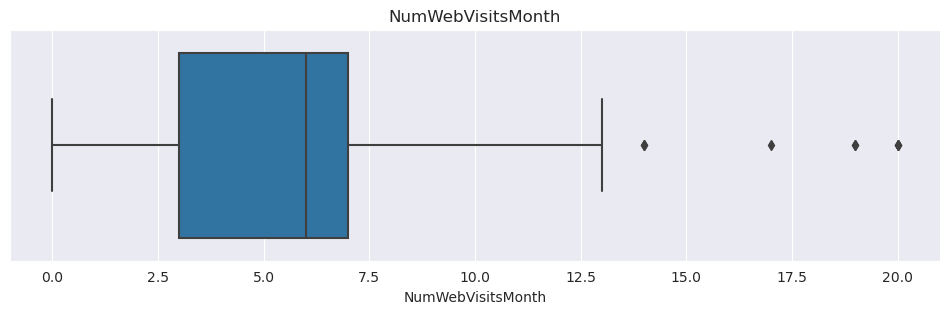

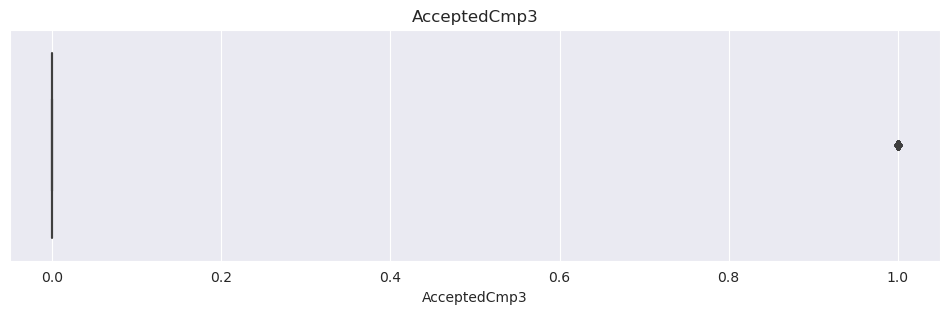

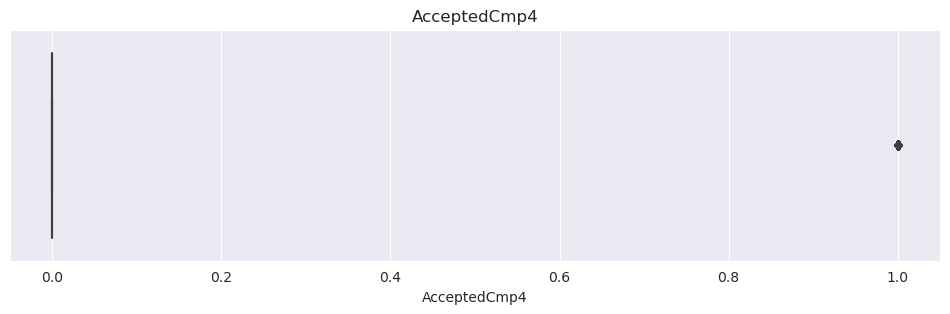

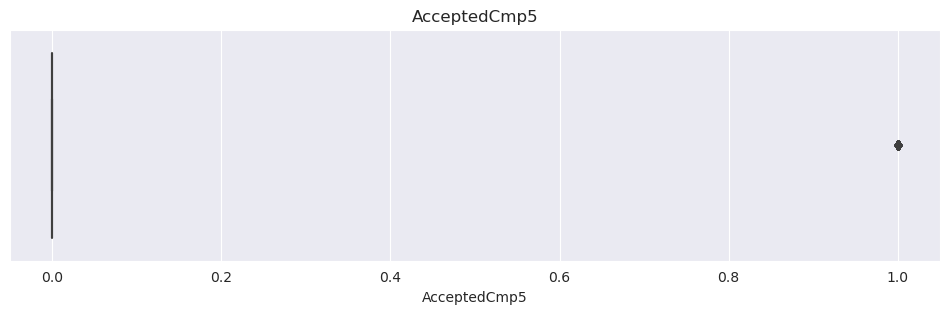

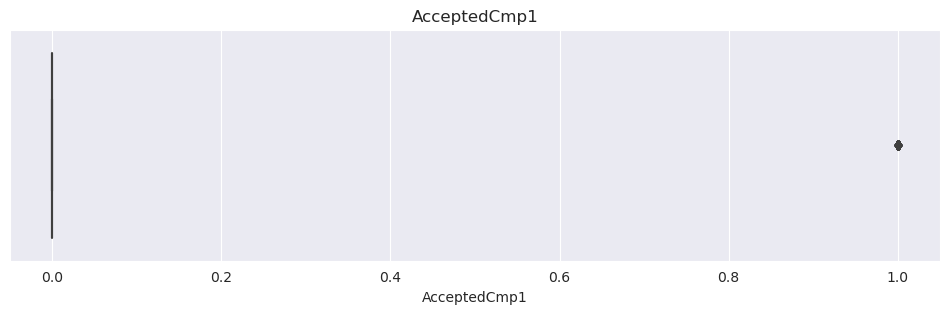

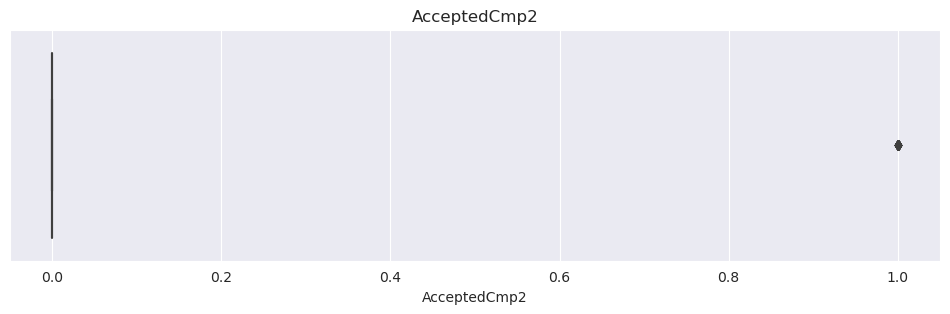

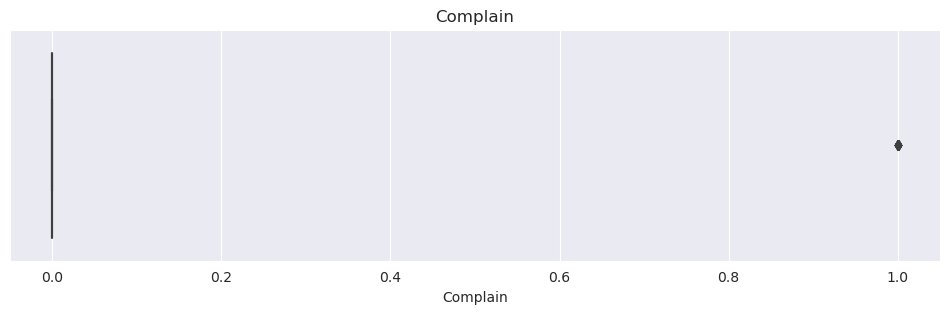

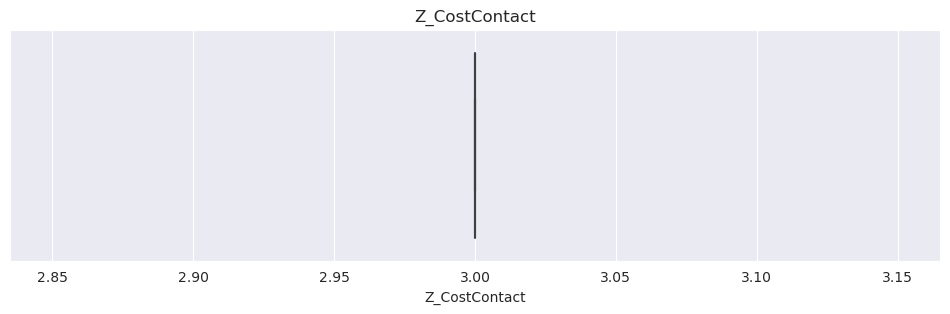

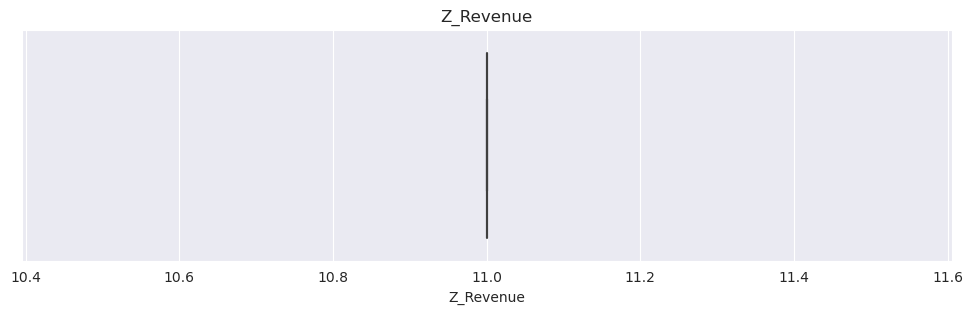

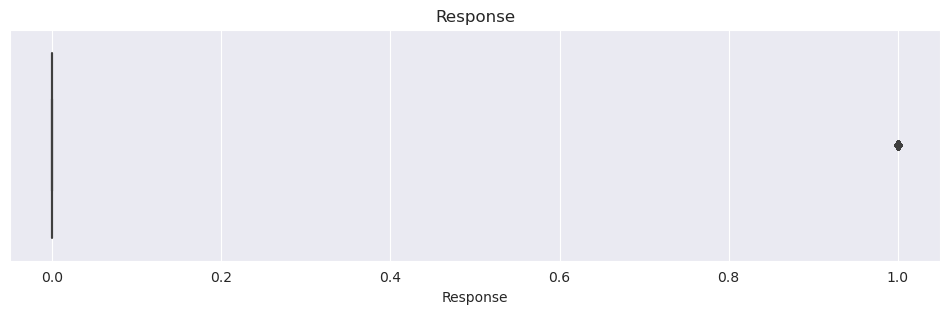

In [10]:
# For each column, create a boxplot
for column in df.select_dtypes(include='number').columns.tolist():
    plt.figure(figsize=(12,3))
    sns.boxplot(x = df[column])
    plt.title(column)
    plt.show()

Investigate how education impacts income for possible imputation.

<AxesSubplot:xlabel='Education', ylabel='Income'>

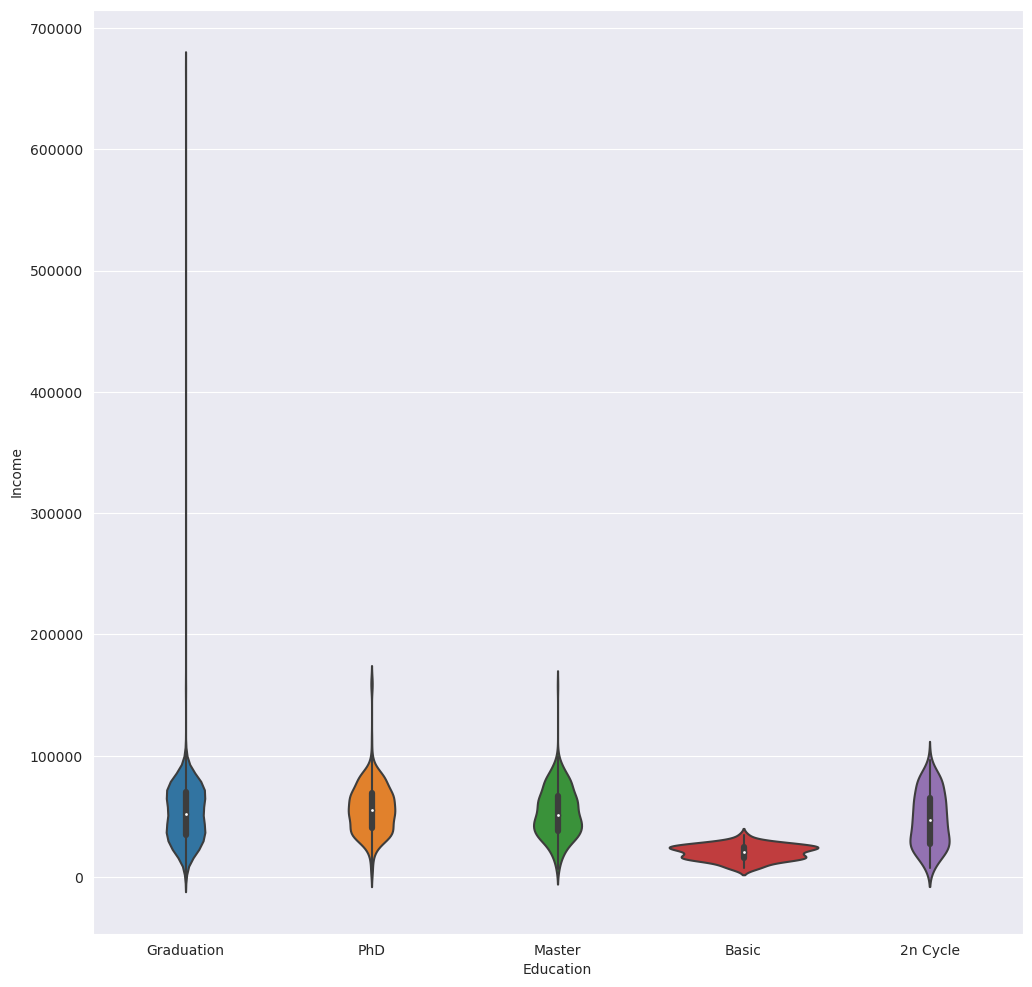

In [11]:
# Violin plots of income for each Education
plt.figure(figsize=(12,12))
sns.violinplot(data=df, x="Education", y="Income")

### Initial EDA conclusions

- ID isn't needed so can be dropped

- Year birth would be better as Age. The dataset origin is 2014, so make a new column of the birth year minus 2014.

- There are 5 different levels of Education. Ordinal order. Basic, Graduation, 2n Cycle, Master Eduction then PhD.

- Marital_Status is categorical. Might be better/easier to describe as either with single or in a relationship.

- I want to keep all the rows, so I'm going to find a way to impute the missing values of income. Likely the best way to do that would be put the median values of that eduction in as the income. Mean values might be skewed by outliers.

- Kidhome and Teenhome could be combined to ChildrenHome

- Dt_Customer might be better converted to numeric "Tenure" to describe the length of time the customer has been with the company.

- Recency can stay as is. Could possibly create a loyalty score with it?

- Could combine all the amounts over departments to get a view on total spent over the last 2 years.

- Number of discounts could be used to indentify only deal seeking customers.

- Number of purchases could be left as is or combined, depending on objective of clustering.

- Number of web visits can be left alone. Can also create a conversion score with number of WebPurchases. 

- Campaign offers can be combined to AcceptedCmp see if they are receptive to campaigns.

- Complain is so small it can be dropped.

- Response can be rolled in with Campaign offers.

- Z_CostContact and Z_Revenue both all have values of 3 and 11 respectively. Could have been useful. Drop them.

## Feature Engineering

In [12]:
# Change Year_Birth to Age by subtracting value from 2014
df['Age'] = 2014 - df['Year_Birth']

In [13]:
# Create ordinal mapping for Education
education_mapping = {'Basic': 1, 'Graduation': 2, '2n Cycle': 3, 'Master': 4, 'PhD':5}
df['EducationOrdinalEncoded'] = df['Education'].map(education_mapping)

In [14]:
# Simplify Marital_Status to in a relationship, out of a relationship or undefined. Then OHE.
# Set map
status_to_relationship = {'Single': 'NotInRelationship',
                          'Divorced': 'NotInRelationship',
                          'Widow': 'NotInRelationship',
                          'Alone': 'NotInRelationship',
                          'Together': 'InRelationship',
                          'Married': 'InRelationship',
                          'Absurd' : 'Undefined',
                          'YOLO': 'Undefined'}

# Apply map
df['Relationship'] = df['Marital_Status'].map(status_to_relationship)

# Create one hot encoding
df = pd.get_dummies(df, columns=['Relationship'])

In [15]:
# Impute income as median of education level

# Compute the median income for each education group
median_incomes = df.groupby('EducationOrdinalEncoded')['Income'].transform('median')

# Use the median income of the corresponding education group to fill the missing values in the 'Income' column
df['Income'].fillna(median_incomes, inplace=True)

In [16]:
# Combine TeenHome and KidHome to ChildrenHome binary
# Create the "ChildrenHome" column, if either TeenHome or KidHome don't equal 0, then 1, otherwise 0.
df['ChildrenHome'] = np.where((df['Teenhome'] != 0) | (df['Kidhome'] != 0), 1, 0)

In [17]:
# Convert Dt_Customer to Tenure to describe the length of time the customer has been with the company

from pandas.tseries.offsets import DateOffset

# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# find the max date and add one month to it
max_date = df['Dt_Customer'].max() + DateOffset(months=1)

# create a new column called 'RegencyInMonths' calculating the number of months
df['RegencyInMonths'] = ((max_date - df['Dt_Customer'])/np.timedelta64(1, 'M')).astype('int')

In [18]:
# Combine amounts across all department spending to get total for 2 years.
df['TotalSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [19]:
# Look at distribution of deal purchases and create a deal seeker column
# 75th percentile is 3 deals. So all above that are deal seekers.
df['DealSeeker'] = np.where(df['NumDealsPurchases'] >= 3, 1, 0)

In [20]:
# Create categorical of web shopper, catalogue and store purchases. Use one hot encoding.
# Define conditions and corresponding results
conditions = [
    (df['NumWebPurchases'] > df['NumCatalogPurchases']) & (df['NumWebPurchases'] > df['NumStorePurchases']),
    (df['NumCatalogPurchases'] > df['NumWebPurchases']) & (df['NumCatalogPurchases'] > df['NumStorePurchases']),
    (df['NumStorePurchases'] > df['NumWebPurchases']) & (df['NumStorePurchases'] > df['NumCatalogPurchases'])
]

choices = ['WebBuyer', 'CatalogueBuyer', 'StoreBuyer']

# Create new column based on conditions and choices
df['BuyerType'] = np.select(conditions, choices, default='MixedBuyer')

df = pd.get_dummies(df, columns=['BuyerType'])

In [21]:
# Websites visits are within last month. Can't do score as Web Purchases are over last 2 years.
# Create recent_website_visit
df['VisitedWebsiteRecently'] = np.where(df['NumWebVisitsMonth'] != 0, 1, 0)

In [22]:
# Combine campaign offer take up to binary, use response as well.
offer_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']

df['AcceptedOffer'] = (df[offer_cols] != 0).any(axis=1).astype(int)

In [23]:
# Drop Z columns, complaints and ID field as useless
df = df.drop(['Z_CostContact','Z_Revenue', 'Complain','ID'], axis=1)

In [24]:
# Drop any columns that are not needed
columns_to_drop = ['Year_Birth','Education','Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

df = df.drop(columns_to_drop, axis=1)

In [25]:
# Check current columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Income                          2240 non-null   float64
 1   Recency                         2240 non-null   int64  
 2   MntWines                        2240 non-null   int64  
 3   MntFruits                       2240 non-null   int64  
 4   MntMeatProducts                 2240 non-null   int64  
 5   MntFishProducts                 2240 non-null   int64  
 6   MntSweetProducts                2240 non-null   int64  
 7   MntGoldProds                    2240 non-null   int64  
 8   NumDealsPurchases               2240 non-null   int64  
 9   NumWebPurchases                 2240 non-null   int64  
 10  NumCatalogPurchases             2240 non-null   int64  
 11  NumStorePurchases               2240 non-null   int64  
 12  NumWebVisitsMonth               22

In [26]:
# Change any datatypes
df['Income'] = df['Income'].round().astype('int64')

In [27]:
# Check for nulls
df.isnull().sum()

Income                            0
Recency                           0
MntWines                          0
MntFruits                         0
MntMeatProducts                   0
MntFishProducts                   0
MntSweetProducts                  0
MntGoldProds                      0
NumDealsPurchases                 0
NumWebPurchases                   0
NumCatalogPurchases               0
NumStorePurchases                 0
NumWebVisitsMonth                 0
Age                               0
EducationOrdinalEncoded           0
Relationship_InRelationship       0
Relationship_NotInRelationship    0
Relationship_Undefined            0
ChildrenHome                      0
RegencyInMonths                   0
TotalSpent                        0
DealSeeker                        0
BuyerType_CatalogueBuyer          0
BuyerType_MixedBuyer              0
BuyerType_StoreBuyer              0
BuyerType_WebBuyer                0
VisitedWebsiteRecently            0
AcceptedOffer               

In [28]:
# Check the statistical summary of the dataframe
df.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,EducationOrdinalEncoded,Relationship_InRelationship,Relationship_NotInRelationship,Relationship_Undefined,ChildrenHome,RegencyInMonths,TotalSpent,DealSeeker,BuyerType_CatalogueBuyer,BuyerType_MixedBuyer,BuyerType_StoreBuyer,BuyerType_WebBuyer,VisitedWebsiteRecently,AcceptedOffer
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52242.592411,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,45.194196,3.047768,0.644643,0.353571,0.001786,0.715179,17.348661,605.798214,0.324554,0.061161,0.133929,0.659821,0.145089,0.995089,0.271875
std,25039.061759,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,11.984069,1.277120,0.478728,0.478185,0.042229,0.451430,7.519060,602.249288,0.468312,0.239678,0.340652,0.473875,0.352269,0.069920,0.445025
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,37.000000,2.000000,0.000000,0.000000,0.000000,0.000000,12.000000,68.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,51498.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,44.000000,2.000000,1.000000,0.000000,0.000000,1.000000,17.000000,396.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,55.000000,4.000000,1.000000,1.000000,0.000000,1.000000,23.000000,1045.500000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,121.000000,5.000000,1.000000,1.000000,1.000000,1.000000,35.000000,2525.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There's someone with an Age of 121?!

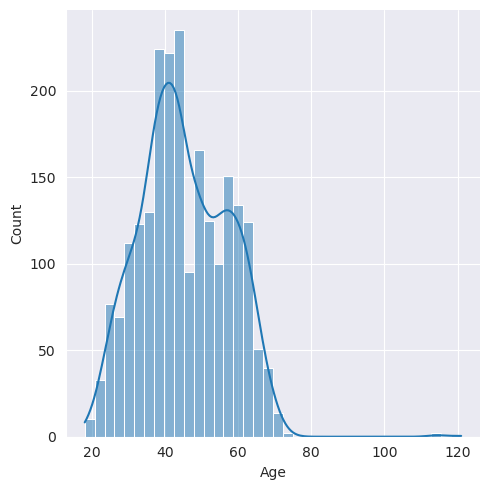

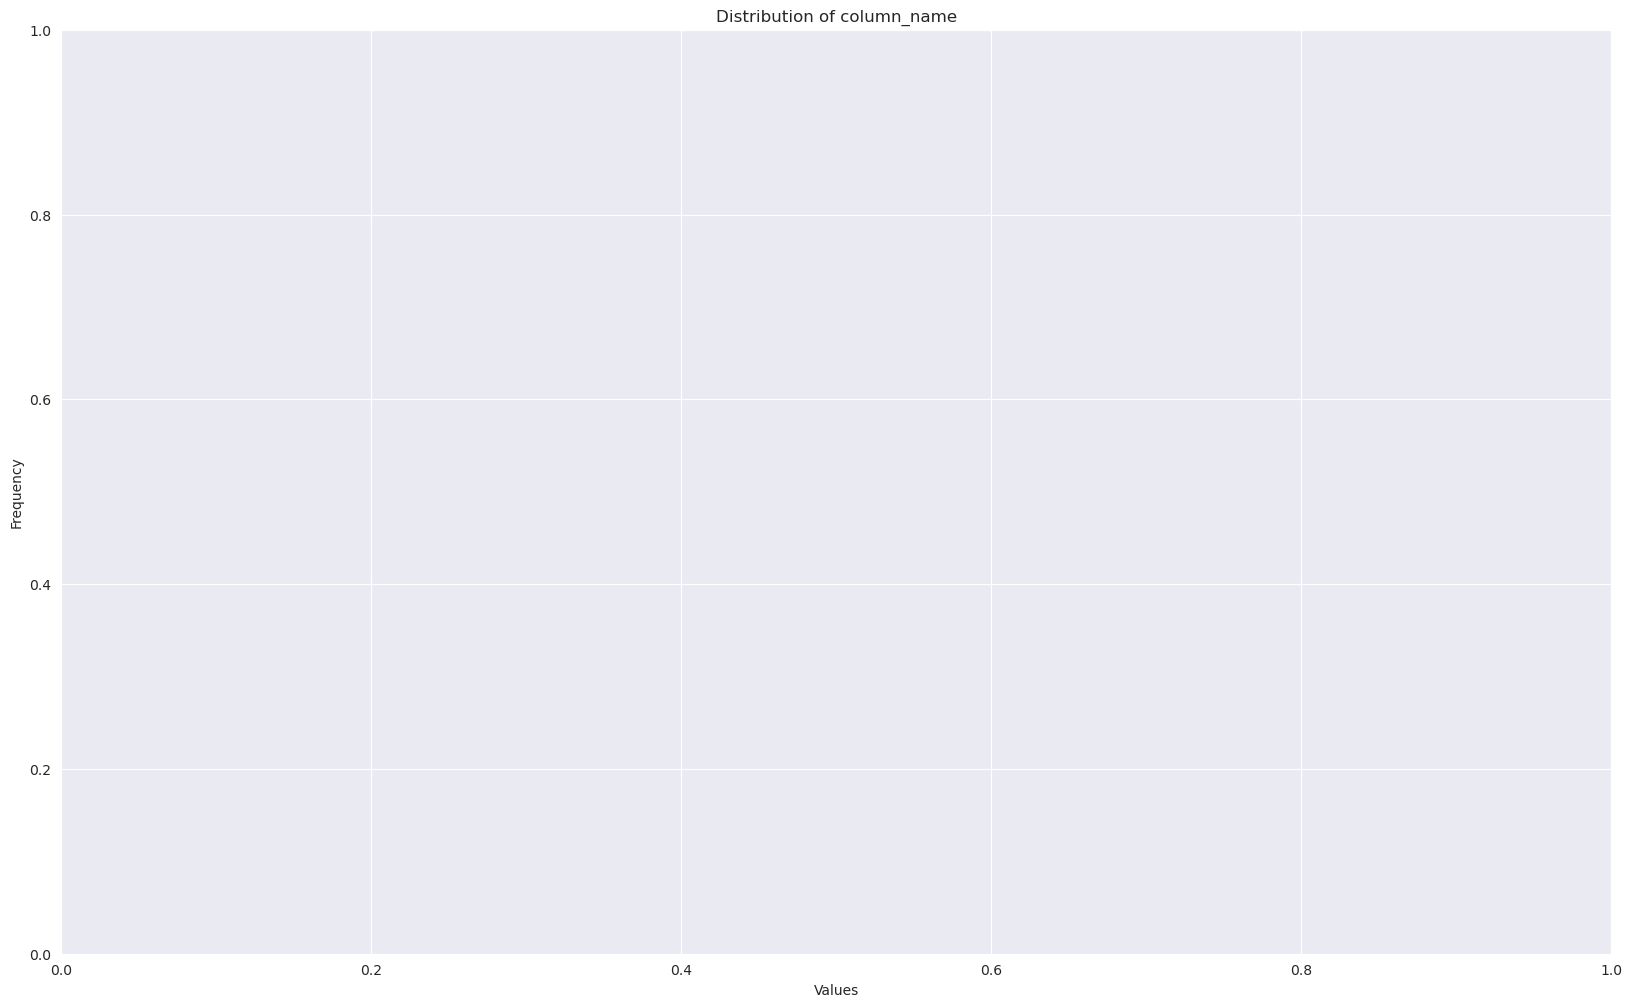

In [29]:
sns.displot(df['Age'], kde=True)
plt.figure(figsize=(20, 12))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of column_name')
plt.show()

I don't think it's unreasonable to hard cap at 90

In [30]:
df = df[df['Age'] <= 90]

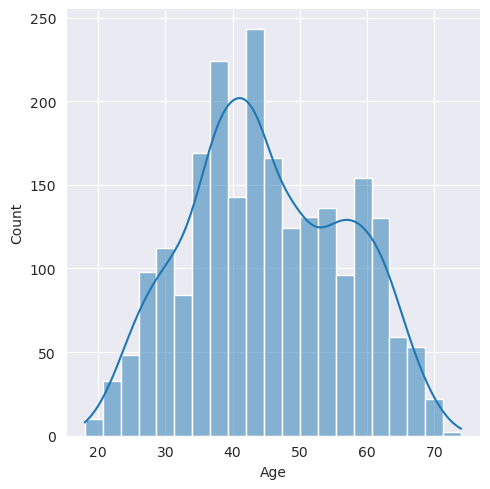

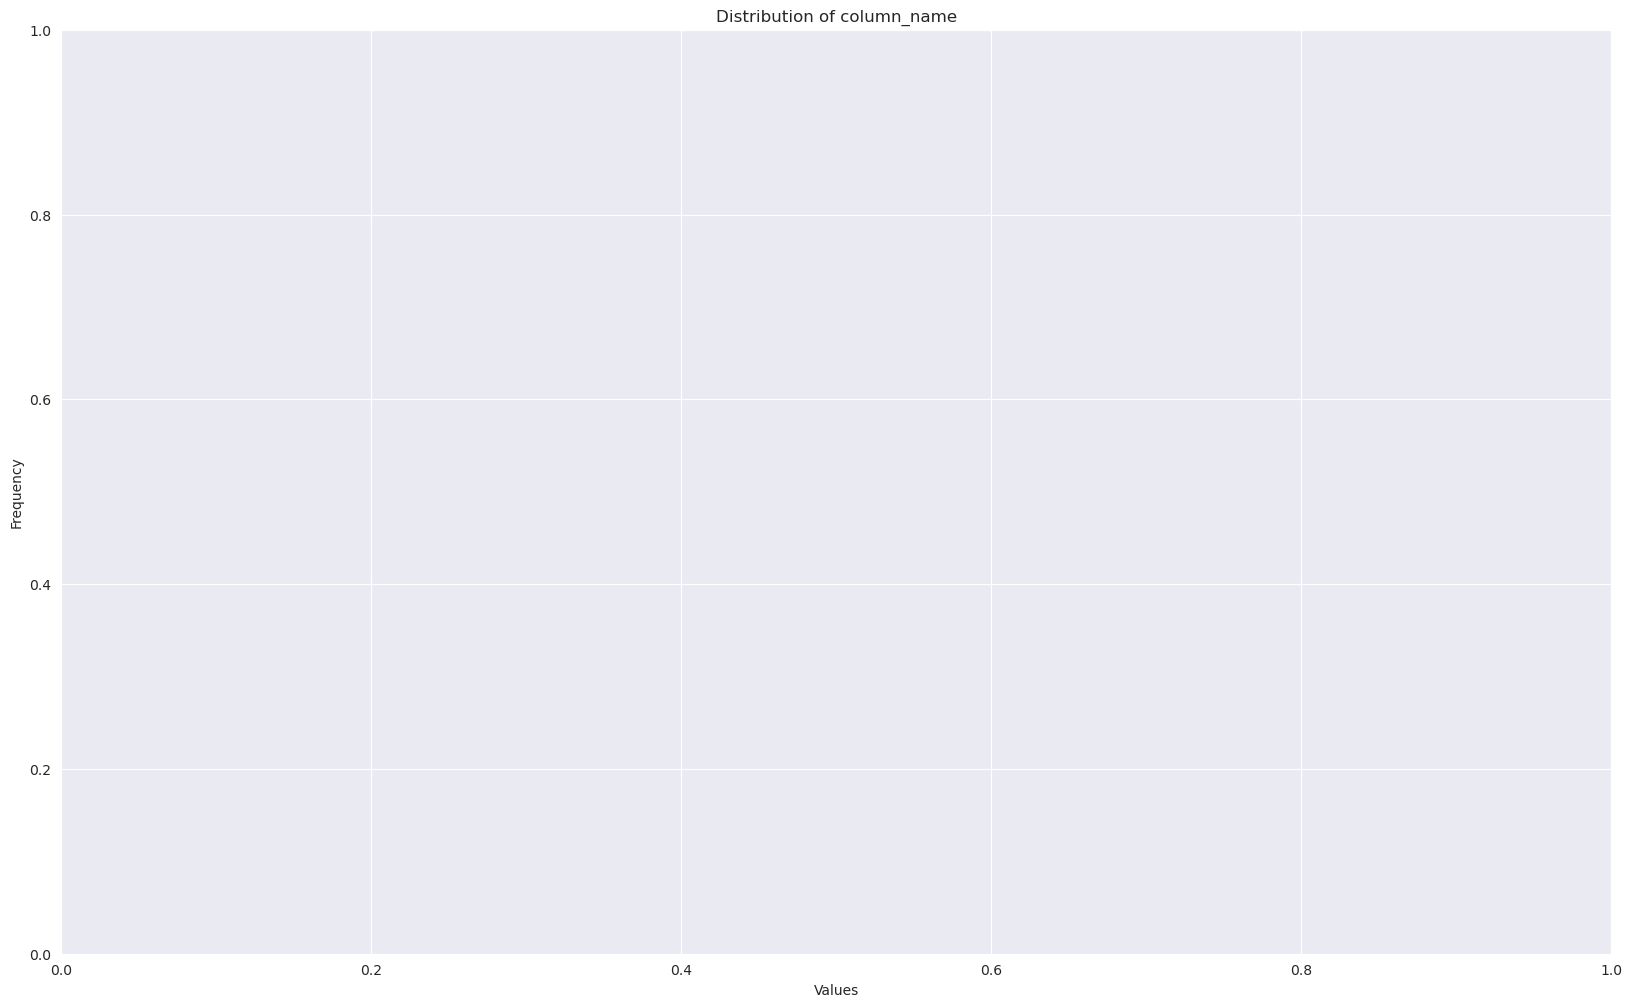

In [31]:
sns.displot(df['Age'], kde=True)
plt.figure(figsize=(20, 12))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of column_name')
plt.show()

Much more reasonable.

### Income?

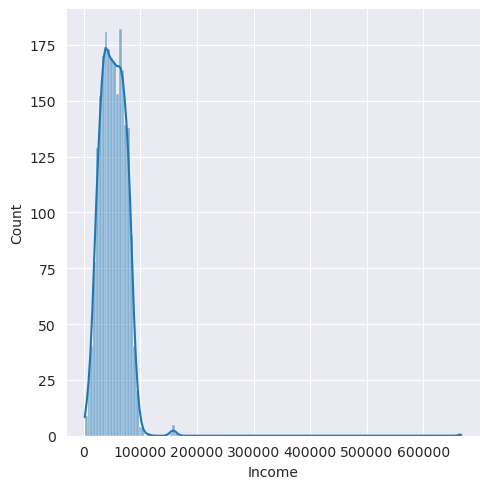

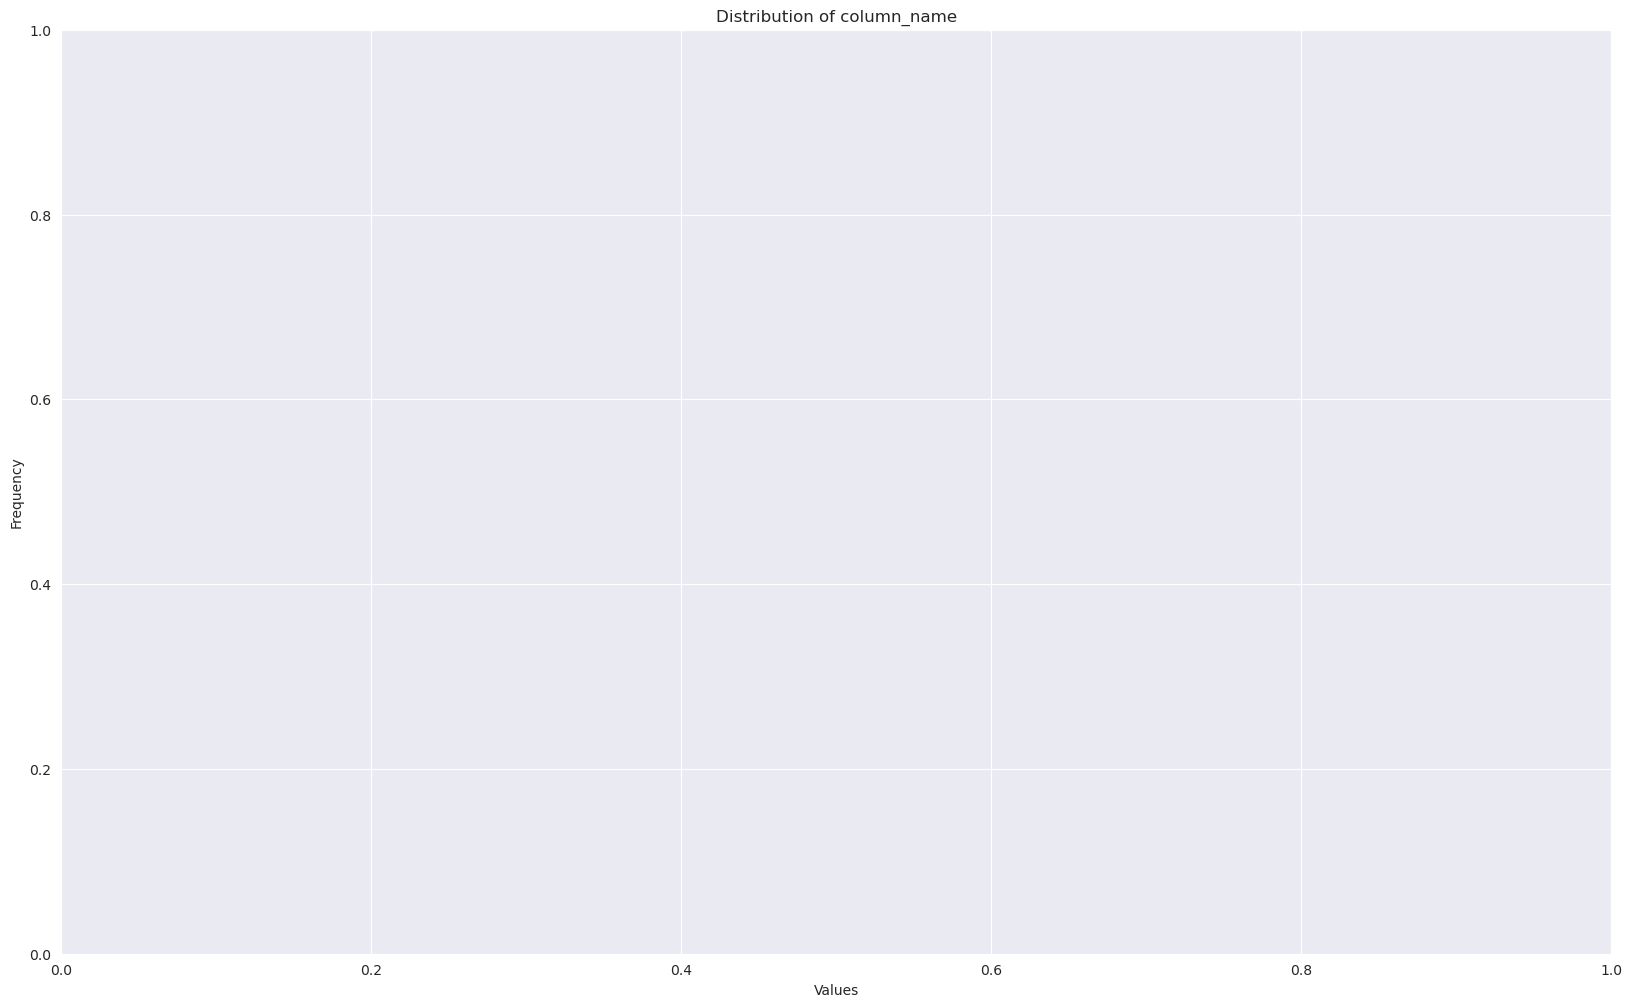

In [32]:
sns.displot(df['Income'], kde=True)
plt.figure(figsize=(20, 12))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of column_name')
plt.show()

There's a huge outlier in the income will skew the results massively. Clustering based on the entire dataset for this customer would be a poor choice. A more bespoke approach to them would yield better results.

In [33]:
massive_income_count = (df['Income'] > 200000).sum()

print(massive_income_count)

1


In [34]:
df = df[df['Income'] <= 200000]

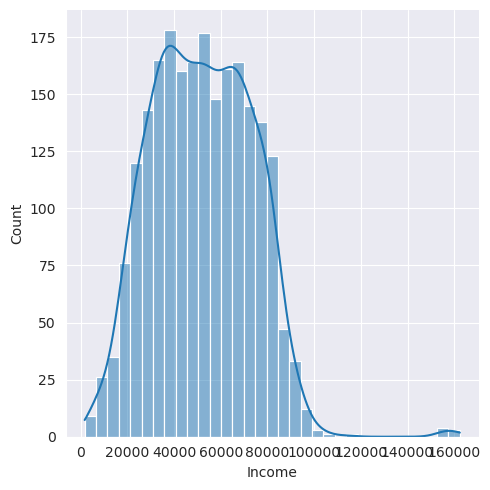

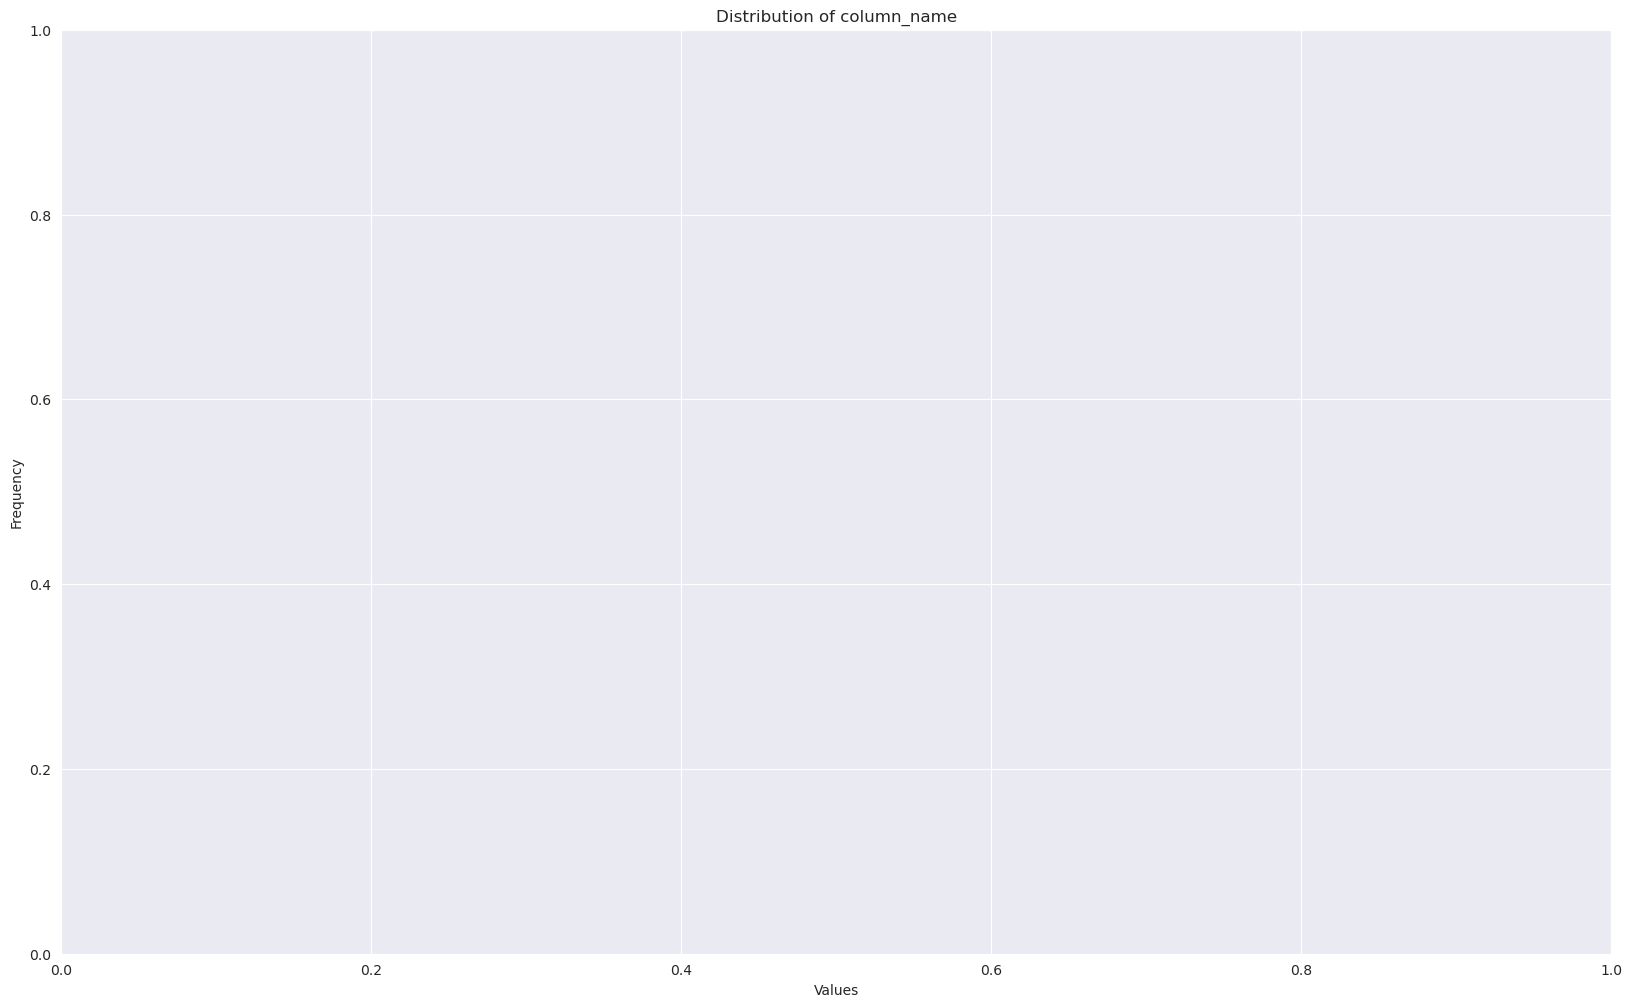

In [35]:
sns.displot(df['Income'], kde=True)
plt.figure(figsize=(20, 12))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of column_name')
plt.show()

Again, much more reasonable

## Export

In [36]:
# Export
df.to_csv('data/feature_engineered_data.csv', index=False)